## Analisis Regresi Ganda
Let's just copy some work.
And yeah, cool right?

Do remove the outputs if it bothers too much. Anw, what'll do:
- Prapemrosesan Data
    - Data Cleaning
    - NA Analysis
    - Outlier
    - Feature Selection
    - Dimensionality Red.
    - Oversampling/Undersampling
- EVD
- Pemodelan dan Optimasi
- Simpulan,Saran, dan Rekomendasi

### Open Library OFC.
and listing files

In [1]:
# Library
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Read and Preprocessing Data 1
Buat dan edit tiap variabel dalam 1 sel, sehingga meminimalisasi error dan redundansi
- read
- delete useless row
- rename name ofc
- change data type
- omit NA

In [2]:
# Note
    # df: initial data
    # df1: rename, as.numeric
library(readxl)

df = read_xlsx(path = "../input/nsc2022/semifinal.xlsx")

# delete useless row
df1 = df[-1,]
str(df1) # or using glimpse, str
names(df1)

# rename
nama.0 = c("PPM","RL1", "PPK", "IPM", "UHH", 
                      "RL2", "San", "Air", "TPT", "TPK", "PDR")
nama.1 = c("Wilayah", paste(rep(nama.0, each=3), 19:21, sep=""))


names(df1) = nama.1

# data type using lapply
df1[,-1] = lapply(df1[,-1], as.numeric)

# get summary and NA's
str(df1)

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...6`
• `` -> `...7`
• `` -> `...9`
• `` -> `...10`
• `` -> `...12`
• `` -> `...13`
• `` -> `...15`
• `` -> `...16`
• `` -> `...18`
• `` -> `...19`
• `` -> `...21`
• `` -> `...22`
• `` -> `...24`
• `` -> `...25`
• `` -> `...27`
• `` -> `...28`
• `` -> `...30`
• `` -> `...31`
• `` -> `...33`
• `` -> `...34`


tibble [548 × 34] (S3: tbl_df/tbl/data.frame)
 $ Nama Wilayah                                                        : chr [1:548] "ACEH" "Simeulue" "Aceh Singkil" "Aceh Selatan" ...
 $ Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)     : chr [1:548] NA "18.99" "20.78" "13.09" ...
 $ ...3                                                                : chr [1:548] NA "18.49" "20.2" "12.87" ...
 $ ...4                                                                : chr [1:548] NA "18.98" "20.36" "13.18" ...
 $ Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                         : chr [1:548] NA "9.08" "8.52" "8.59" ...
 $ ...6                                                                : chr [1:548] NA "9.34" "8.53" "8.87" ...
 $ ...7                                                                : chr [1:548] NA "9.48" "8.68" "8.88" ...
 $ Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)        : num [1:548] NA 7210 8715 8187 8067 ...
 $ ...9            

[1] "Nama Wilayah"                                                        
 [2] "Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)"     
 [3] "...3"                                                                
 [4] "...4"                                                                
 [5] "Rata-rata Lama Sekolah Penduduk 15+ (Tahun)"                         
 [6] "...6"                                                                
 [7] "...7"                                                                
 [8] "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)"        
 [9] "...9"                                                                
[10] "...10"                                                               
[11] "Indeks Pembangunan Manusia"                                          
[12] "...12"                                                               
[13] "...13"                                                               
[14] "Umur Harapan Hidup (Tahun)"                                          
[15] "...15"                                                               
[16] "...16"                                                               
[17] "Rata-Rata Lama Sekolah Penduduk Umur 15 Tahun ke Atas"               
[18] "...18"                                                               
[19] "...19"                                                               
[20] "Persentase rumah tangga yang memiliki akses terhadap sanitasi layak" 
[21] "...21"                                                               
[22] "...22"                                                               
[23] "Persentase rumah tangga yang memiliki akses terhadap air minum layak"
[24] "...24"                                                               
[25] "...25"                                                               
[26] "Tingkat Pengangguran Terbuka"                                        
[27] "...27"                                                               
[28] "...28"                                                               
[29] "Tingkat Partisipasi Angkatan Kerja"                                  
[30] "...30"                                                               
[31] "...31"                                                               
[32] "PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)"          
[33] "...33"                                                               
[34] "...34"

tibble [548 × 34] (S3: tbl_df/tbl/data.frame)
 $ Wilayah: chr [1:548] "ACEH" "Simeulue" "Aceh Singkil" "Aceh Selatan" ...
 $ PPM19  : num [1:548] NA 19 20.8 13.1 13.4 ...
 $ PPM20  : num [1:548] NA 18.5 20.2 12.9 13.2 ...
 $ PPM21  : num [1:548] NA 19 20.4 13.2 13.4 ...
 $ RL119  : num [1:548] NA 9.08 8.52 8.59 9.65 ...
 $ RL120  : num [1:548] NA 9.34 8.53 8.87 9.66 ...
 $ RL121  : num [1:548] NA 9.48 8.68 8.88 9.67 ...
 $ PPK19  : num [1:548] NA 7210 8715 8187 8067 ...
 $ PPK20  : num [1:548] NA 7085 8707 8089 8020 ...
 $ PPK21  : num [1:548] NA 7148 8776 8180 8030 ...
 $ IPM19  : num [1:548] NA 65.7 68.9 66.9 69.4 ...
 $ IPM20  : num [1:548] NA 66 68.9 67.1 69.4 ...
 $ IPM21  : num [1:548] NA 66.4 69.2 67.4 69.4 ...
 $ UHH19  : num [1:548] NA 65.2 67.4 64.3 68 ...
 $ UHH20  : num [1:548] NA 65.3 67.4 64.3 68.1 ...
 $ UHH21  : num [1:548] NA 65.3 67.4 64.4 68.2 ...
 $ RL219  : num [1:548] NA 9.22 8.94 9.17 8.97 ...
 $ RL220  : num [1:548] NA 10.06 8.92 9.31 9.62 ...
 $ RL221  : num [1

In [3]:
# df2: add provinsi, del. prov, as.factor

df2 = cbind(df1[,1], df1)

for (i in 2:nrow(df2)){
    df2[i,1] = ifelse(is.na(df2[i,3])==F,df2[i-1,1],df2[i,1])
}

colnames(df2)[1:2]= c("Prov","Kab")

df2 = df2[!is.na(df1$PPM19),]

df2[,1:2] = lapply(df2[,1:2], as.factor)

str(df2) #dah bersih

'data.frame':	514 obs. of  35 variables:
 $ Prov : Factor w/ 34 levels "ACEH","BALI",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Kab  : Factor w/ 514 levels "Aceh Barat","Aceh Barat Daya",..: 448 6 5 9 10 8 1 3 401 58 ...
 $ PPM19: num  19 20.8 13.1 13.4 14.5 ...
 $ PPM20: num  18.5 20.2 12.9 13.2 14.1 ...
 $ PPM21: num  19 20.4 13.2 13.4 14.4 ...
 $ RL119: num  9.08 8.52 8.59 9.65 7.86 ...
 $ RL120: num  9.34 8.53 8.87 9.66 8.15 ...
 $ RL121: num  9.48 8.68 8.88 9.67 8.21 ...
 $ PPK19: num  7210 8715 8187 8067 8600 ...
 $ PPK20: num  7085 8707 8089 8020 8489 ...
 $ PPK21: num  7148 8776 8180 8030 8577 ...
 $ IPM19: num  65.7 68.9 66.9 69.4 67.4 ...
 $ IPM20: num  66 68.9 67.1 69.4 67.6 ...
 $ IPM21: num  66.4 69.2 67.4 69.4 67.8 ...
 $ UHH19: num  65.2 67.4 64.3 68 68.7 ...
 $ UHH20: num  65.3 67.4 64.3 68.1 68.7 ...
 $ UHH21: num  65.3 67.4 64.4 68.2 68.7 ...
 $ RL219: num  9.22 8.94 9.17 8.97 8.34 ...
 $ RL220: num  10.06 8.92 9.31 9.62 8.76 ...
 $ RL221: num  9.99 9.21 8.92 9.89 8.75 ...
 $ San

## Oke, ini bersih

Prov,Kab,tahun,PPM,RL1,PPK,IPM,UHH,RL2,San,Air,TPT,TPK,PDR
<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACEH,Simeulue,19,18.99,9.08,7210,65.70,65.22,9.218529,65.46784,83.27363,5.824548,62.49769,1600521
ACEH,Simeulue,20,18.49,9.34,7085,66.03,65.26,10.061174,66.51296,79.78502,5.468784,70.36660,1602411
ACEH,Simeulue,21,18.98,9.48,7148,66.41,65.28,9.986247,71.56467,87.44882,5.714106,71.15319,1648096
ACEH,Aceh Singkil,19,20.78,8.52,8715,68.91,67.36,8.941491,73.53562,80.13610,8.575345,59.08809,1731165
ACEH,Aceh Singkil,20,20.20,8.53,8707,68.94,67.39,8.924306,64.22249,72.72270,8.243327,61.97063,1713664
ACEH,Aceh Singkil,21,20.36,8.68,8776,69.22,67.43,9.205076,69.56265,78.57524,8.363735,62.85427,1780419


tibble [1,542 × 14] (S3: tbl_df/tbl/data.frame)
 $ Prov : Factor w/ 34 levels "ACEH","BALI",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Kab  : Factor w/ 514 levels "Aceh Barat","Aceh Barat Daya",..: 448 448 448 6 6 6 5 5 5 9 ...
 $ tahun: chr [1:1542] "19" "20" "21" "19" ...
 $ PPM  : num [1:1542] 19 18.5 19 20.8 20.2 ...
 $ RL1  : num [1:1542] 9.08 9.34 9.48 8.52 8.53 8.68 8.59 8.87 8.88 9.65 ...
 $ PPK  : num [1:1542] 7210 7085 7148 8715 8707 ...
 $ IPM  : num [1:1542] 65.7 66 66.4 68.9 68.9 ...
 $ UHH  : num [1:1542] 65.2 65.3 65.3 67.4 67.4 ...
 $ RL2  : num [1:1542] 9.22 10.06 9.99 8.94 8.92 ...
 $ San  : num [1:1542] 65.5 66.5 71.6 73.5 64.2 ...
 $ Air  : num [1:1542] 83.3 79.8 87.4 80.1 72.7 ...
 $ TPT  : num [1:1542] 5.82 5.47 5.71 8.58 8.24 ...
 $ TPK  : num [1:1542] 62.5 70.4 71.2 59.1 62 ...
 $ PDR  : num [1:1542] 1600521 1602411 1648096 1731165 1713664 ...
 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



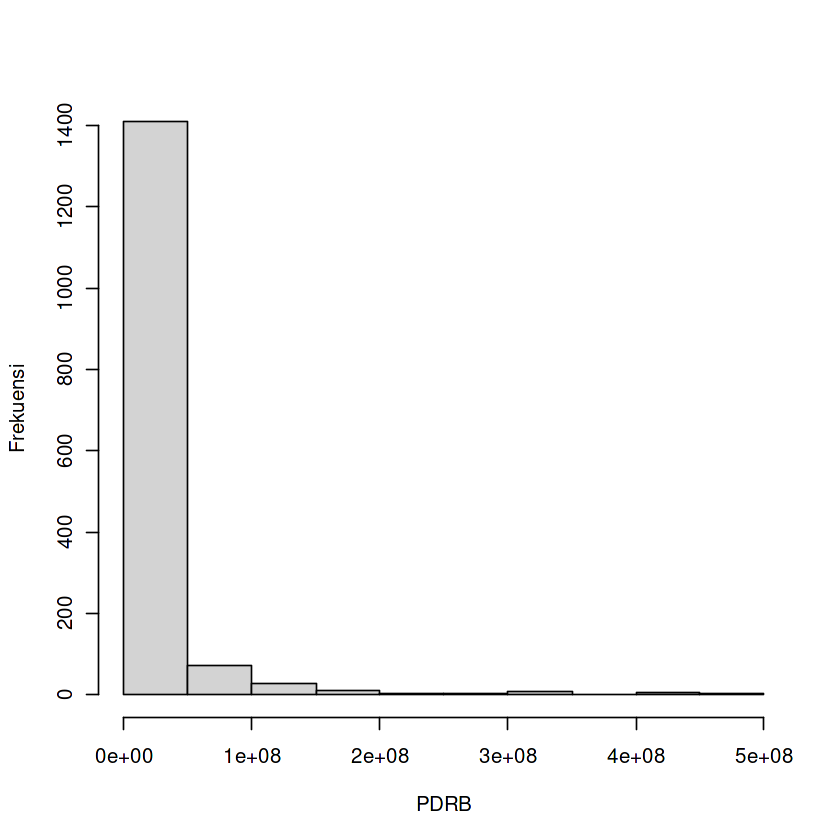

,Prov,Kab,tahun,PPM,RL1,PPK,IPM,UHH,RL2,San,Air,TPT,TPK,PDR,
1542,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


tibble [514 × 13] (S3: tbl_df/tbl/data.frame)
 $ Prov: Factor w/ 34 levels "ACEH","BALI",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Kab : Factor w/ 514 levels "Aceh Barat","Aceh Barat Daya",..: 448 6 5 9 10 8 1 3 401 58 ...
 $ PPM : num [1:514] 19 20.4 13.2 13.4 14.4 ...
 $ RL1 : num [1:514] 9.48 8.68 8.88 9.67 8.21 ...
 $ PPK : num [1:514] 7148 8776 8180 8030 8577 ...
 $ IPM : num [1:514] 66.4 69.2 67.4 69.4 67.8 ...
 $ UHH : num [1:514] 65.3 67.4 64.4 68.2 68.7 ...
 $ RL2 : num [1:514] 9.99 9.21 8.92 9.89 8.75 ...
 $ San : num [1:514] 71.6 69.6 62.6 62.7 66.7 ...
 $ Air : num [1:514] 87.4 78.6 79.7 86.7 83.2 ...
 $ TPT : num [1:514] 5.71 8.36 6.46 6.43 7.13 ...
 $ TPK : num [1:514] 71.2 62.9 60.8 69.6 59.5 ...
 $ PDR : num [1:514] 14.3 14.4 15.3 15.1 15.9 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   142569   3595984   8555948  21598356  19436301 460081046 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.90   15.11   15.99   16.01   16.80   19.95 

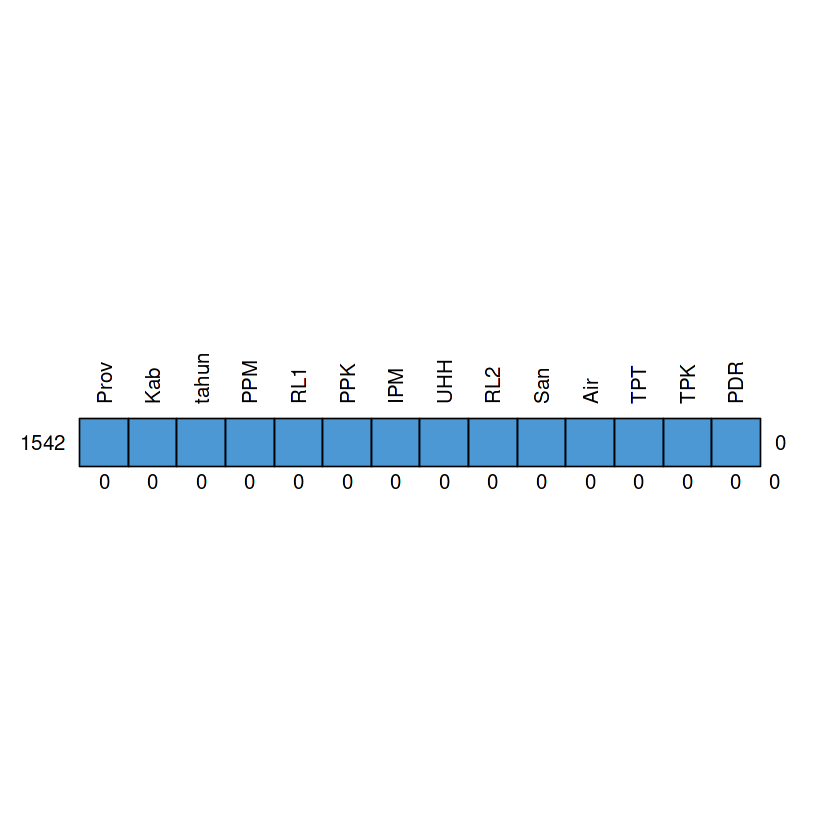

In [4]:
library(finalfit)

# df3: pivot longer.
df3 = df2
df3 = 
    df3 %>% 
    pivot_longer(cols=3:ncol(df3), 
                 names_to=c(".value", "tahun"), 
                 names_pattern="(...)(..)" )

head(df3)
str(df3)
write.csv(df3, "nsc22_bersih.csv")


hist(df3$PDR, xlab="PDRB", ylab="Frekuensi", main="")

# no NA's
missing_pattern(df3)

# df4: only 2021 and do log
df4 = df3[df3$tahun==21, -3]
df4[,"PDR"] = lapply(df4[,"PDR"], log)
str(df4)

summary(df3$PDR)
summary(df4$PDR)


## Do what?
Analisis ini bertujuan untuk mengetahui faktor-faktor sosal-kependudukan apa saja yang berpengaruh terhadap kondisi ekonomi masyarakat Indonesia tahun 2021. Kondisi ekonomi tersebut diukur melalui indikator
[PDRB](https://www.bps.go.id/subject/171/produk-domestik-regional-bruto--pengeluaran-.html#subjekViewTab2)
atas harga konstan dengan pendekatan pengeluaran.

corrplot 0.92 loaded


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
PPM,0.43709077,2.287854
RL1,0.04854018,20.601489
PPK,0.14505984,6.893707
IPM,0.02899951,34.483339
UHH,0.23397359,4.273987
RL2,0.07191083,13.906112
San,0.42066135,2.377209
Air,0.60128279,1.663111
TPT,0.45906906,2.178321


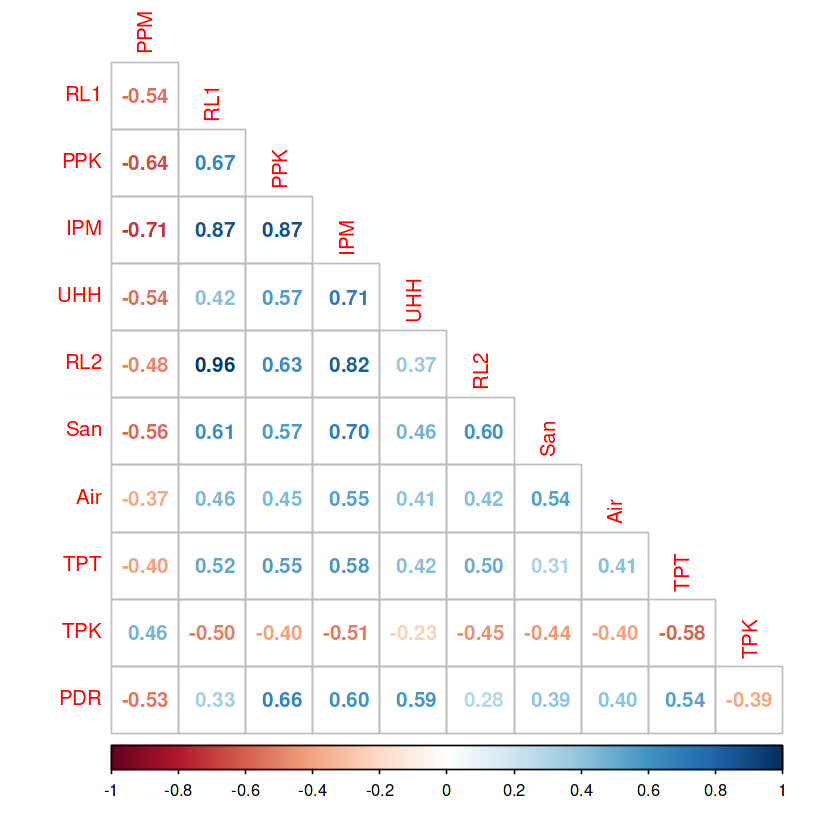

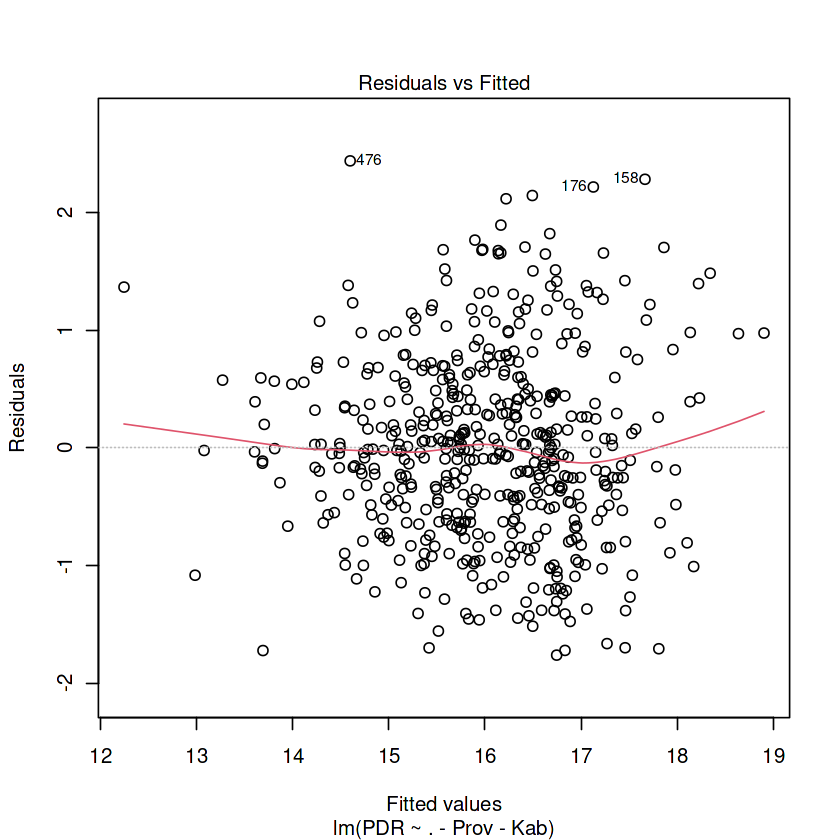

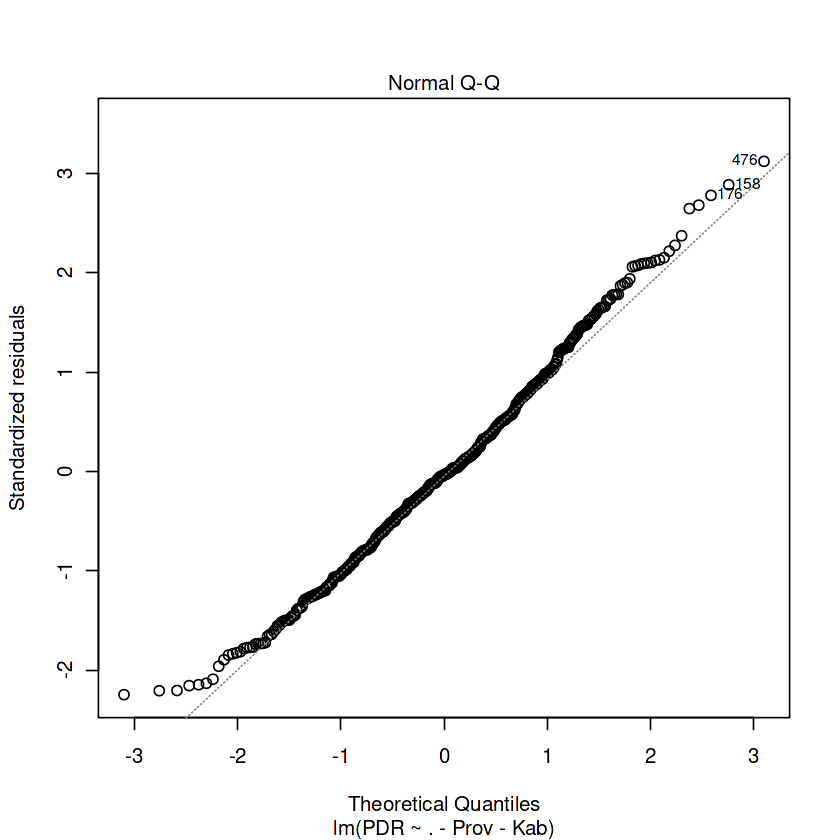

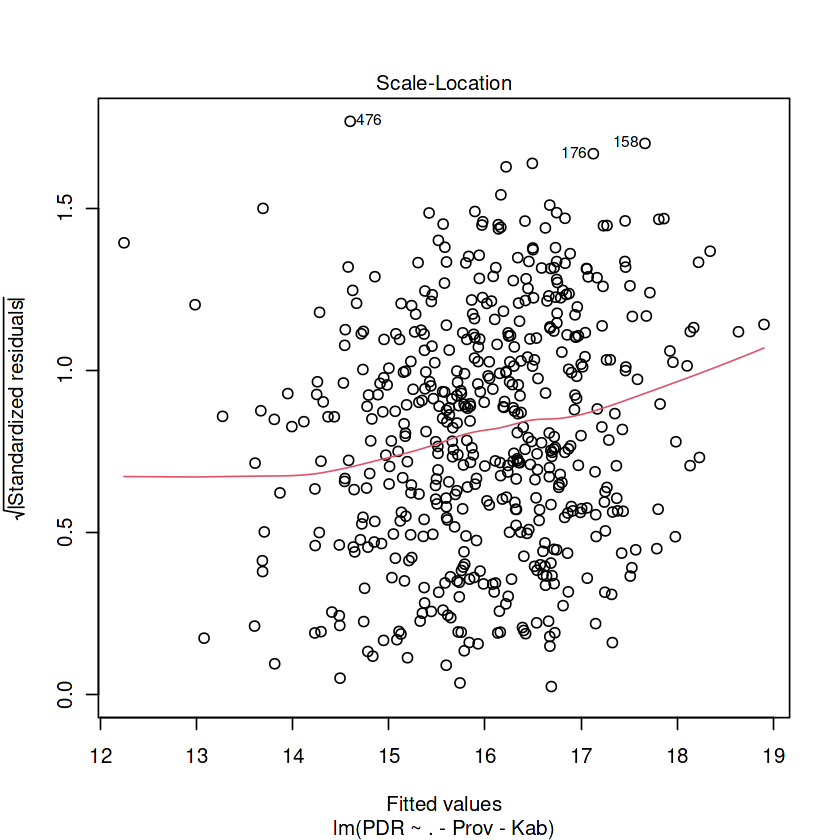

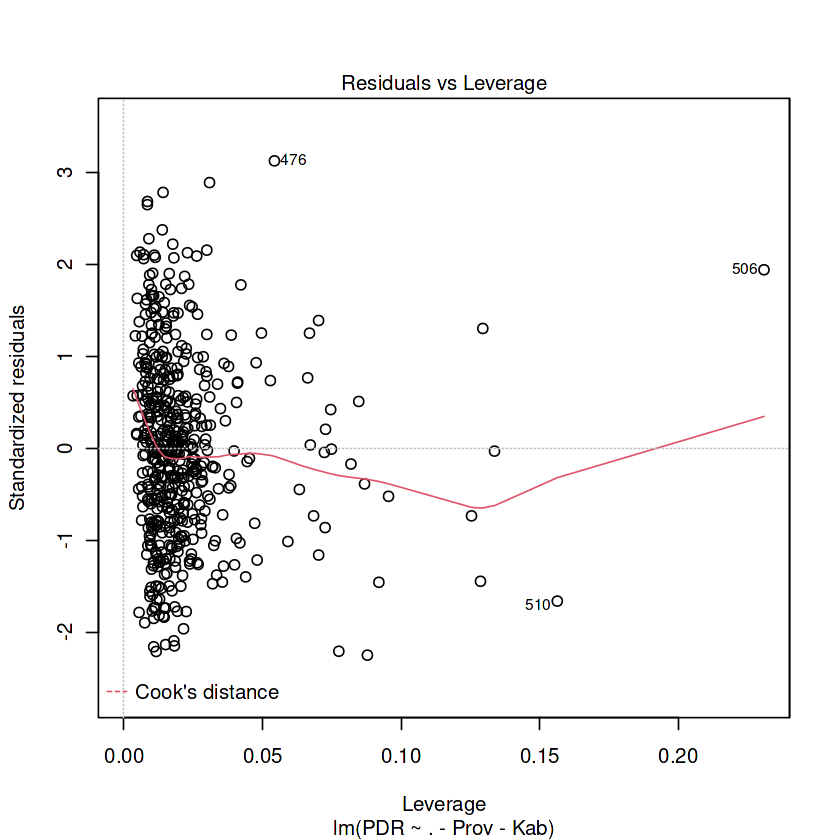

In [5]:
# corrplot: df4
library(corrplot)
library(olsrr)

# Corr and Plot
corr = cor(df4[,-c(1:2)])

# Berkorelasi secara sangat lemah hingga cukup
corrplot(corr, type="low", diag=F, method="num")

lm1 = lm(PDR ~.-Prov-Kab,df4)
ols_vif_tol(lm1)

plot(lm1)

### Preprocessing Data 2
Oke?
- NA filling
-

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4




Call:
lm(formula = PDR ~ ., data = df5, subset = id.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82409 -0.51657  0.01061  0.48598  2.54297 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.004e+01  1.578e+00   6.361 9.69e-10 ***
PPM         -8.124e-03  9.916e-03  -0.819 0.413408    
RL1         -4.162e-02  1.398e-01  -0.298 0.766191    
PPK          2.201e-04  4.933e-05   4.461 1.24e-05 ***
IPM          3.701e-02  4.635e-02   0.798 0.425388    
UHH          5.710e-02  3.076e-02   1.856 0.064622 .  
RL2         -4.058e-01  1.209e-01  -3.357 0.000912 ***
San          5.234e-03  3.997e-03   1.310 0.191550    
Air          2.365e-03  4.302e-03   0.550 0.583034    
TPT          1.504e-01  2.896e-02   5.192 4.36e-07 ***
TPK         -2.494e-03  1.145e-02  -0.218 0.827762    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8109 on 246 degrees of freedom
Multiple R-squared:  0.6435,	Adjust

[1] 0.6653213

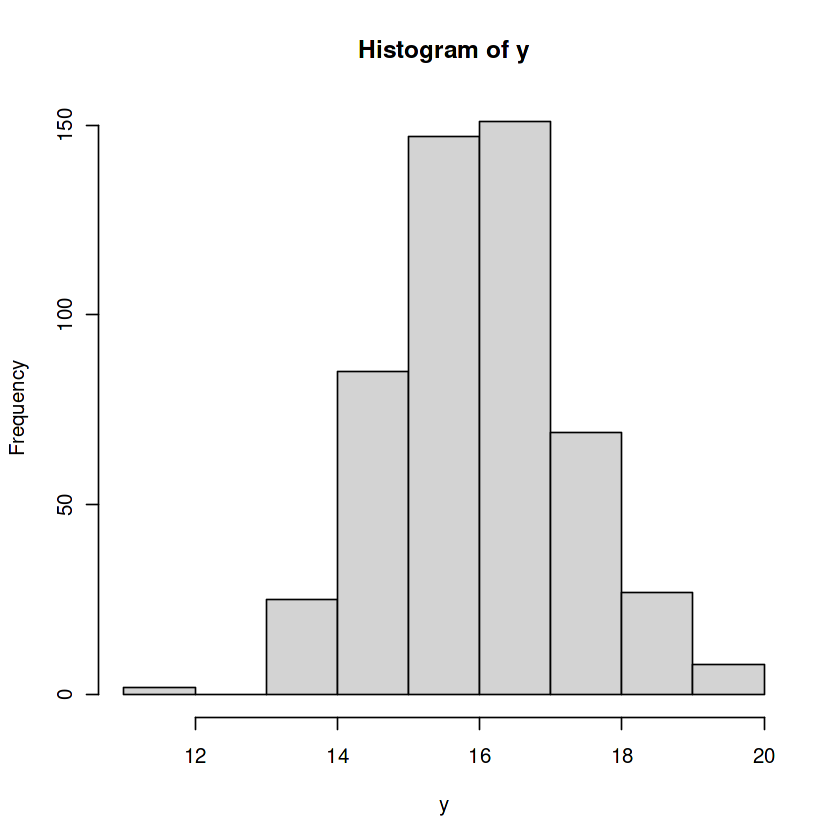

[1] 0.6655088

[1] 0.639915

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  9.7387194746
PPM         -0.0158644642
RL1         -0.1335550706
PPK          0.0001722681
IPM          0.0356119664
UHH          0.0715590614
RL2         -0.1872741394
San          0.0006182042
Air          0.0050568940
TPT          0.1076586520
TPK         -0.0147206892

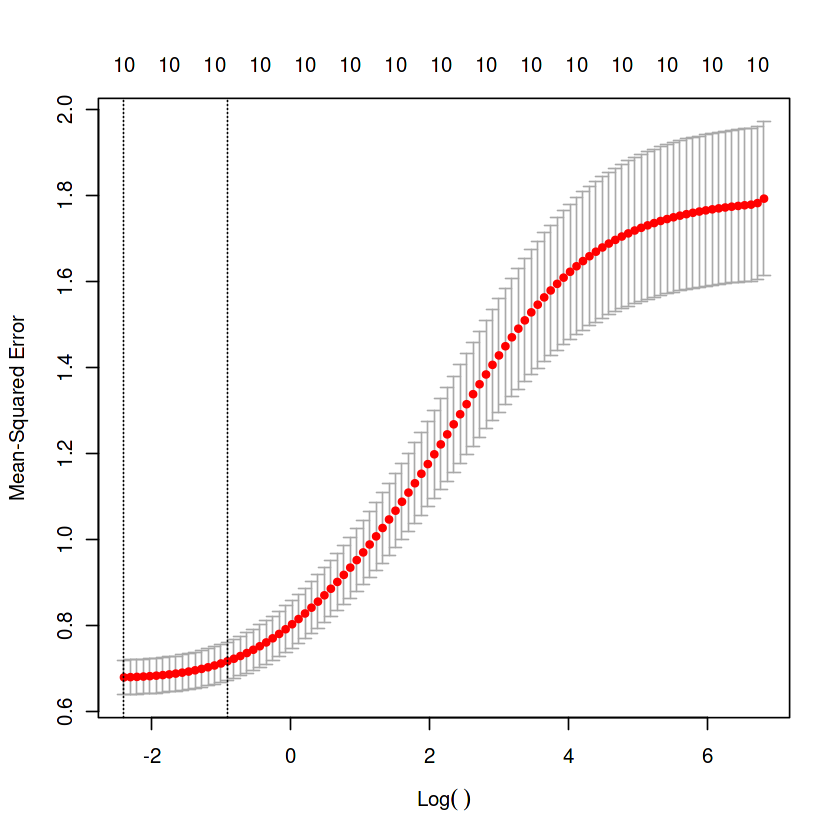

[1] 0.6626338

[1] 1.440469

s1
14.59885
15.69934
15.28725


3 x 1 Matrix of class "dgeMatrix"
           s1
[1,] 14.59885
[2,] 15.69934
[3,] 15.28725

lambda:  0.0182819 


11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) 10.0237716945
PPM         -0.0137620190
RL1         -0.0455405420
PPK          0.0002148429
IPM          0.0054554318
UHH          0.0861827625
RL2         -0.2206233587
San          .           
Air          0.0045669117
TPT          0.1049761669
TPK         -0.0147852642

11 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  8.9295105739
PPM         -0.0082284683
RL1          .           
PPK          0.0001695083
IPM          .           
UHH          0.0818324082
RL2         -0.0606301452
San          .           
Air          0.0004369378
TPT          0.0847579567
TPK         -0.0028137515

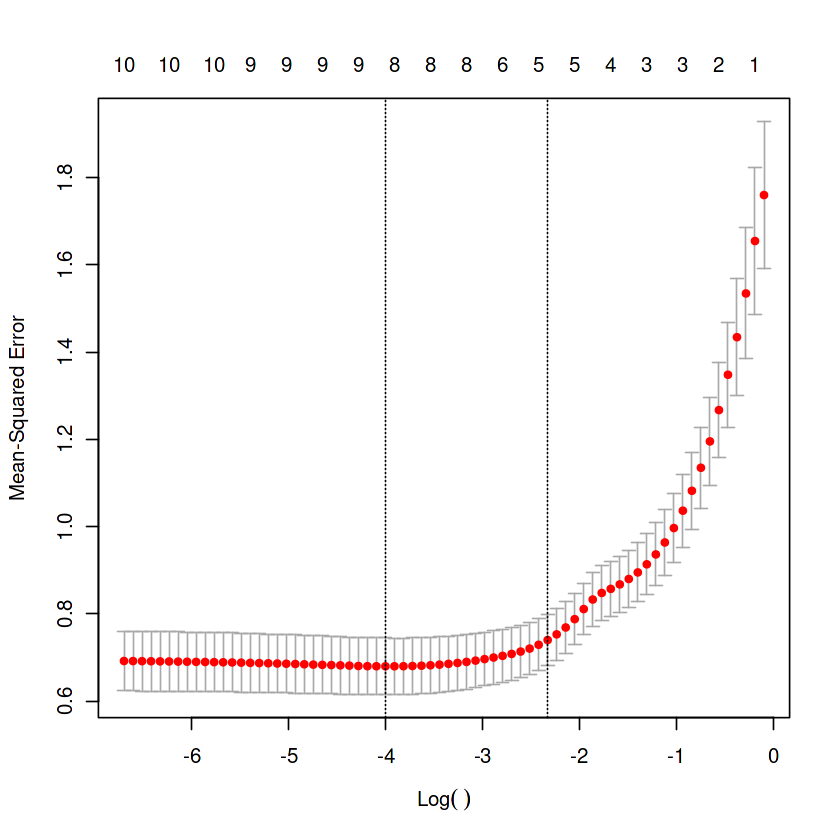

In [6]:
set.seed(123)

# Ridge and Lasso regression
library(glmnet)

# x-y and test-train
id.test = sample(1:nrow(df4), nrow(df4)/2)
id.train = -id.test

x = as.matrix(df4[,3:12])
y = df4$PDR
hist(y)

df5 = df4[,3:13]

# LM model
# Full
lm1.mod = lm(PDR~., df5, subset=id.train)
summary(lm1.mod)
lm1.pred = predict(lm1.mod, df5[id.test,])
mean((lm1.pred-y[id.test])^2) #tapi bermasalah

# grid lambda
grid = 10^seq(10, -2, length=100)

# RIDGE model
ridge.mod = glmnet(x[id.train, ], y[id.train], alpha=0, lambda=grid)

ridge.cv = cv.glmnet(x[id.train, ], y[id.train], alpha=0)
plot(ridge.cv)
ridge.lam = ridge.cv$lambda.min

# model for some lambda: 0-RSS,best 
ridge.pred0 = predict(ridge.mod, s=0, newx=x[id.test,], exact=T, 
                     x=x[id.train,], y=y[id.train])
mean((ridge.pred0-y[id.test])^2)

ridge.pred1 = predict(ridge.mod, s=ridge.lam, newx=x[id.test,], 
                     x=x[id.train,], y=y[id.train])
mean((ridge.pred1-y[id.test])^2)

# coef 
ridge.df = glmnet(x, y, alpha=0)
predict(ridge.df, type="coeff", s=ridge.lam)


# LASSO model
lasso.mod = glmnet(x[id.train, ], y[id.train], alpha=1, lambda=grid)

lasso.cv = cv.glmnet(x[id.train, ], y[id.train], alpha=1)
plot(lasso.cv)
lasso.lam = lasso.cv$lambda.min

# model for some lambda: 0-RSS,best 
lasso.pred1 = predict(lasso.mod, s=lasso.lam, newx=x[id.test,], 
                     x=x[id.train,], y=y[id.train])

mean((lasso.pred1-y[id.test])^2)
mean((mean(y[id.test])-y[id.test])^2)


# coef 
lasso.df = glmnet(x, y, alpha=1)
lasso.coef = predict(lasso.df, type="coeff", s=lasso.lam)

lasso.pred2 = predict(lasso.df, s=lasso.lam, newx=x[1:3,],  
                     x=x, y=y)
lasso.pred2
cbind(1,x[1:3,])%*%lasso.coef

cat("lambda: ",lasso.lam, "\n")
lasso.coef


predict(lasso.df, type="coeff", s=0.1)

In [7]:
cat(paste(round(lasso.coef,4), rownames(lasso.coef)), sep=" + ")

10.0238 (Intercept) + -0.0138 PPM + -0.0455 RL1 + 2e-04 PPK + 0.0055 IPM + 0.0862 UHH + -0.2206 RL2 + 0 San + 0.0046 Air + 0.105 TPT + -0.0148 TPK

### EDA
Isinya ya eksplorasi data, just what ur expectations?